### Evalucación de los modelos para Knights Archers Zombies

En primer lugar se evalúan los modelos durante 10 partidas y se genera un vídeo con la ejecución del mejor modelo.

In [3]:
import imageio
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import PPO
from pettingzoo.butterfly import knights_archers_zombies_v10
import supersuit as ss
import cv2
import numpy as np


env = knights_archers_zombies_v10.env(render_mode='rgb_array',max_cycles=2000)
env = ss.black_death_v3(env)
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 3)


model = PPO.load("policies_PPO/policy_new_log_eval/best_model")

images = []
obs = env.reset()
img = env.render()
env.reset()
for agent in env.agent_iter():
   images.append(img)
   obs, reward, done, info,_ = env.last()
   act = model.predict(obs, deterministic=True)[0] if not done else None
   env.step(act)
#    env.render()
   img = env.render()

imageio.mimsave('ppo_KAZ.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)


In [7]:
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import PPO
from pettingzoo.butterfly import knights_archers_zombies_v10
import supersuit as ss
import cv2
import numpy as np

# env_kwargs = dict(max_cycles=2000, max_zombies=15, vector_state=False)
env = knights_archers_zombies_v10.env(render_mode=None,max_cycles=2000)
env = ss.black_death_v3(env)
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 3)
# env = ss.pettingzoo_env_to_vec_env_v1(env)
# env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class='stable_baselines3')

model = PPO.load("policies_PPO/policy_log_eval/best_model")
rewards = {agent: 0 for agent in env.possible_agents}

num_games=10

for i in range(num_games):
    print("juego ",i)
    env.reset(seed=i)
    env.action_space(env.possible_agents[0]).seed(i)
    # env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info,_ = env.last()
        # if reward>=1:
        #     print(reward>=1)
        for agent in env.agents:
                rewards[agent] += env.rewards[agent]
        # if reward >= 1:
        #         print("Rewards agentes: ",rewards)
        act = model.predict(obs, deterministic=True)[0] if not done else None
        env.step(act)
        # env.render()

env.close()
print("Recompensas totales: ", rewards)
print("Recompensas medias por juego: ")
for key,val in rewards.items():
    total = val/num_games
    print(total,key)

C:\Users\v_ic_\AppData\Roaming\Python\Python38\site-packages\pettingzoo\utils\conversions.py:252: UserWarning: The base environment `knights_archers_zombies_v10` does not have a `render_mode` defined.
  warnings.warn(


juego  0
juego  1
juego  2
juego  3
juego  4
juego  5
juego  6
juego  7
juego  8
juego  9
Recompensas totales:  {'archer_0': 36.0, 'archer_1': 27.0, 'knight_0': 1.0, 'knight_1': 0.0}
Recompensas medias por juego: 
3.6 archer_0
2.7 archer_1
0.1 knight_0
0.0 knight_1


In [8]:
from stable_baselines3.ppo import CnnPolicy, MlpPolicy, MultiInputPolicy
from stable_baselines3 import PPO
from pettingzoo.butterfly import knights_archers_zombies_v10
import supersuit as ss
import cv2
import numpy as np

# env_kwargs = dict(max_cycles=2000, max_zombies=15, vector_state=False)
env = knights_archers_zombies_v10.env(render_mode=None,max_cycles=2000)
env = ss.black_death_v3(env)
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 3)
# env = ss.pettingzoo_env_to_vec_env_v1(env)
# env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class='stable_baselines3')

model = PPO.load("policies_PPO/policy_new_log_eval/best_model")
rewards = {agent: 0 for agent in env.possible_agents}

num_games=10

for i in range(num_games):
    print("juego ",i)
    env.reset(seed=i)
    env.action_space(env.possible_agents[0]).seed(i)
    # env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info,_ = env.last()
        # if reward>=1:
        #     print(reward>=1)
        for agent in env.agents:
                rewards[agent] += env.rewards[agent]
        # if reward >= 1:
        #         print("Rewards agentes: ",rewards)
        act = model.predict(obs, deterministic=True)[0] if not done else None
        env.step(act)
        # env.render()

env.close()
print("Recompensas totales: ", rewards)
print("Recompensas medias por juego: ")
for key,val in rewards.items():
    total = val/num_games
    print(total,key)

juego  0
juego  1
juego  2
juego  3
juego  4
juego  5
juego  6
juego  7
juego  8
juego  9
Recompensas totales:  {'archer_0': 33.0, 'archer_1': 41.0, 'knight_0': 1.0, 'knight_1': 3.0}
Recompensas medias por juego: 
3.3 archer_0
4.1 archer_1
0.1 knight_0
0.3 knight_1


A partir de esta celda se crean las gráficas de evaluaciones durante el entrenamiento

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_train_policy(file_csv, y_axis,title,y_title):
    data = pd.read_csv(file_csv)

    
    plt.figure(figsize=(10, 6))

    
    plt.plot(data['time/total_timesteps'], data[y_axis], marker='o', linestyle='-')

    plt.title(title)
    plt.xlabel('Timesteps')
    plt.ylabel(y_title)
    plt.grid(True)  

    plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_policy_reg_line(file_csv, y_axis,title,y_title):
    data = pd.read_csv(file_csv)

    
    sns.lmplot(x='time/total_timesteps',y=y_axis,data=data,fit_reg=True,line_kws={"color": "red"})


    plt.title(title)
    plt.xlabel('Timesteps')
    plt.ylabel(y_title)
    plt.grid(True)  

    plt.show()

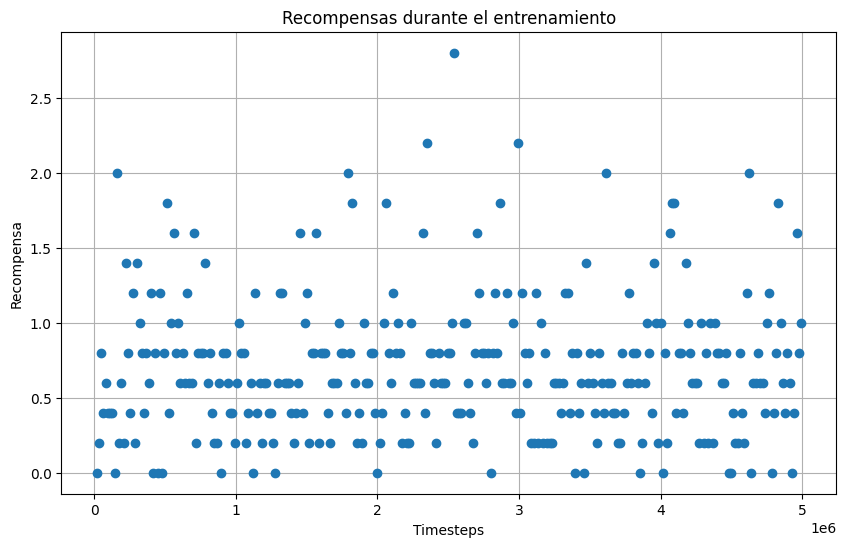

In [18]:
plot_train_policy("policies_PPO/policy_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

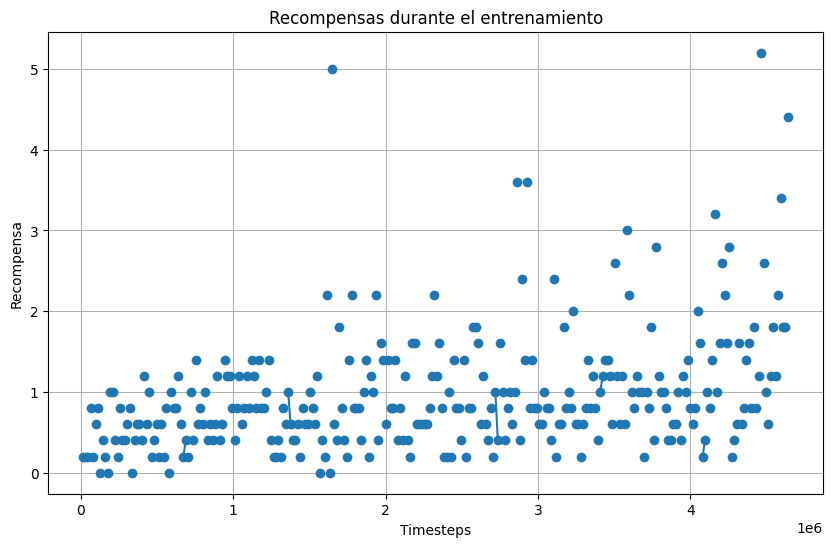

In [19]:
plot_train_policy("policies_PPO/policy_new_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

In [ ]:
###### Solo aprende con el policy new sobre todo al final del entrenamiento
###### Se hace presente su dependencia de los hiperparametros

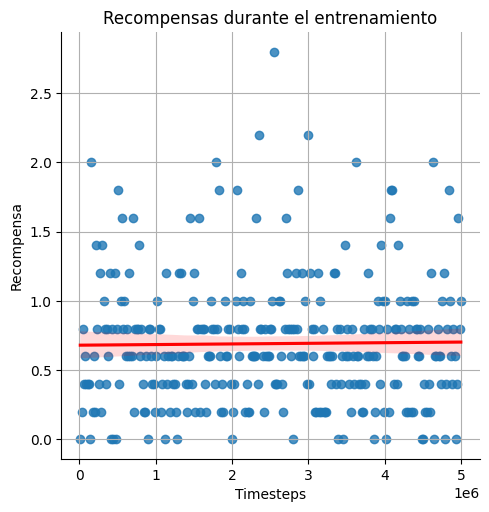

In [20]:
plot_train_policy_reg_line("policies_PPO/policy_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

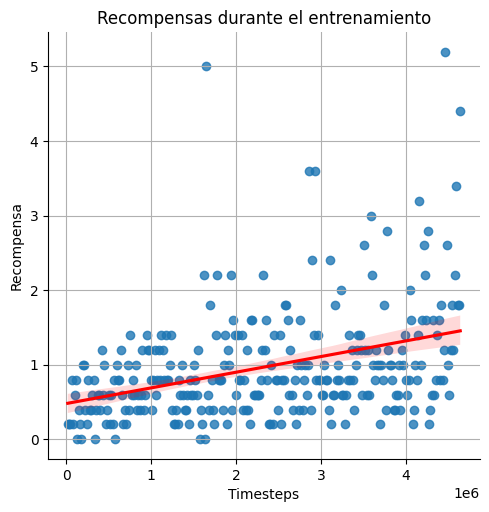

In [21]:
plot_train_policy_reg_line("policies_PPO/policy_new_log_eval/progress.csv",'eval/mean_reward','Recompensas durante el entrenamiento','Recompensa')

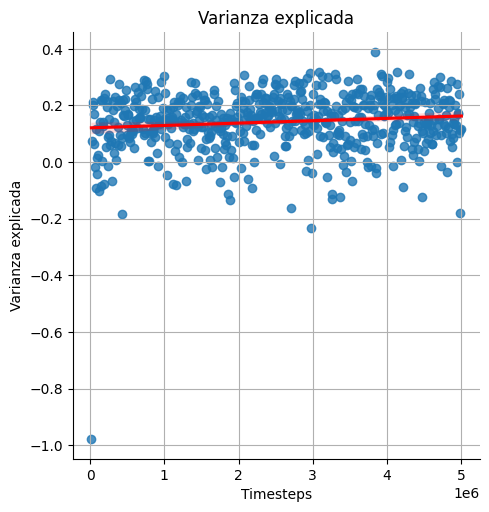

In [23]:
plot_train_policy_reg_line("policies_PPO/policy_log_eval/progress.csv",'train/explained_variance','Varianza explicada','Varianza explicada')

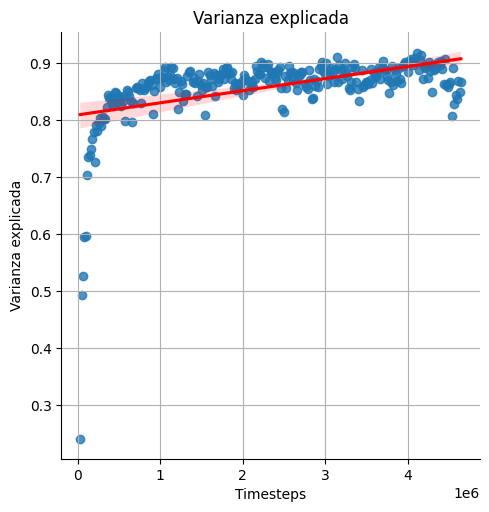

In [24]:
plot_train_policy_reg_line("policies_PPO/policy_new_log_eval/progress.csv",'train/explained_variance','Varianza explicada','Varianza explicada')